## Predicting the CO2 emissions using RandomForest model 

In [25]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from math import sqrt
from catboost import CatBoostRegressor

In [2]:
train = pd.read_csv('C:/Users/91798/Documents/Air_Quality_Project/train.csv')
test = pd.read_csv('C:/Users/91798/Documents/Air_Quality_Project/test.csv')

In [3]:
print('No. of rows and columns in train dataset :', train.shape)
print('No. of rows and columns in test dataset :', test.shape)

No. of rows and columns in train dataset : (79023, 76)
No. of rows and columns in test dataset : (24353, 75)


In [4]:
train.isna().sum().sort_values(ascending = False)

UvAerosolLayerHeight_aerosol_height          78584
UvAerosolLayerHeight_solar_zenith_angle      78584
UvAerosolLayerHeight_solar_azimuth_angle     78584
UvAerosolLayerHeight_sensor_azimuth_angle    78584
UvAerosolLayerHeight_aerosol_pressure        78584
                                             ...  
latitude                                         0
week_no                                          0
year                                             0
longitude                                        0
emission                                         0
Length: 76, dtype: int64

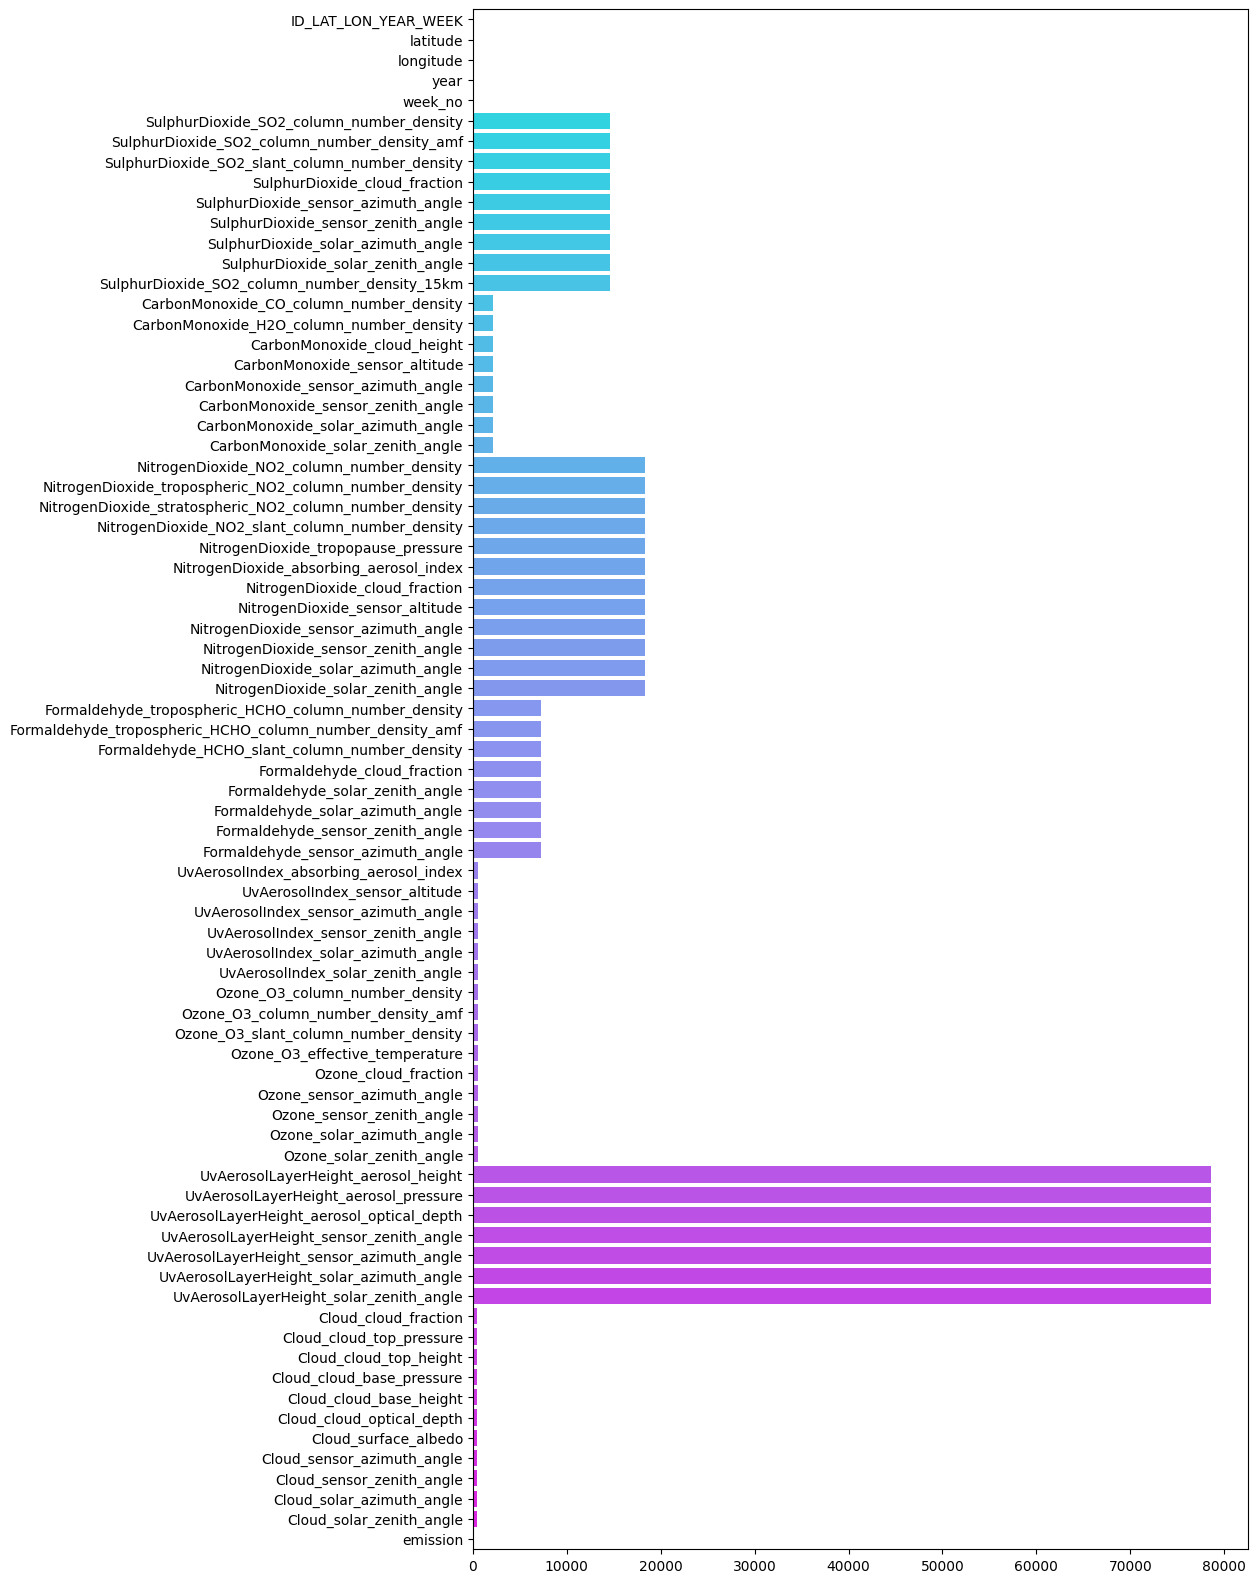

In [8]:
plt.figure(figsize=(10,20))
sns.barplot(x= train.isna().sum().values,y= train.isna().sum().index,palette='cool')

plt.show()

### Handeling NaN values 

In [9]:
# making a list of columns containing the empty values 
nan_columns = []

for c in train.columns:
    if train[c].isna().sum() > 1 and train[c].dtypes != 'O':
        nan_columns.append(c)

# filling those values with the median value of the column 
for c in nan_columns:
    train[c].fillna(train[c].median(),inplace=True)

In [10]:
train.isna().sum().sort_values(ascending = False).head()

ID_LAT_LON_YEAR_WEEK              0
Ozone_O3_column_number_density    0
Ozone_solar_azimuth_angle         0
Ozone_sensor_zenith_angle         0
Ozone_sensor_azimuth_angle        0
dtype: int64

In [11]:
test.isna().sum().sort_values(ascending = False).head()

UvAerosolLayerHeight_aerosol_pressure         22260
UvAerosolLayerHeight_aerosol_optical_depth    22260
UvAerosolLayerHeight_sensor_zenith_angle      22260
UvAerosolLayerHeight_sensor_azimuth_angle     22260
UvAerosolLayerHeight_aerosol_height           22260
dtype: int64

In [12]:
# Simillarly doing it for the test dataset 
nan_test_columns = []

for c in test.columns:
    if test[c].isna().sum() > 1 and test[c].dtypes != 'O':
        nan_test_columns.append(c)

# filling those values with the median value of the column 
for c in nan_test_columns:
    test[c].fillna(test[c].median(),inplace=True)

In [13]:
test.isna().sum().sort_values(ascending = False).head()

ID_LAT_LON_YEAR_WEEK          0
Ozone_solar_zenith_angle      0
Ozone_sensor_zenith_angle     0
Ozone_sensor_azimuth_angle    0
Ozone_cloud_fraction          0
dtype: int64

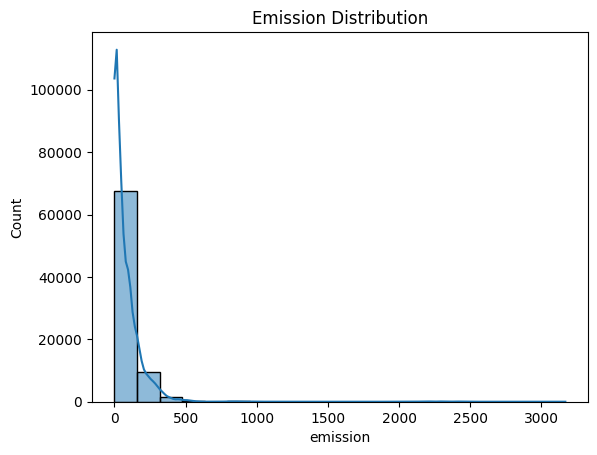

In [18]:
# Checking target veriable 
plt.title('Emission Distribution')
sns.histplot(train.emission , kde = True , bins=20)

plt.show()

### Model training 

In [19]:
train_ = train.copy()
x = train_.drop(["emission",'ID_LAT_LON_YEAR_WEEK',], axis=1,inplace = True)
y = train["emission"]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(train_,y,test_size=0.3,random_state=1)

In [21]:
model = RandomForestRegressor(n_estimators=20,random_state=42)

In [22]:
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [27]:
mae = mean_absolute_error(y_test,pred)
print("Score is =",sqrt(mae))
mse = mean_squared_error(y_test,pred)
print('Mean squared error is: ',mse)

Score is = 2.9585297457562603
Mean squared error is:  477.7219195903108


### Mean squared error is too high for this model, it could be due to improper handeling of NaN values 

#### trying with different method of handeling NaN values in next Notebook 